In [6]:
print(env.observation_space.n)
print(env.action_space.n)

16
4


In [9]:
!pip install Pillow


In [2]:
import gym

# Create FrozenLake environment
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False,render_mode="human")

# Reset the environment
observation = env.reset()

# Render the environment in Jupyter Notebook
env.render()


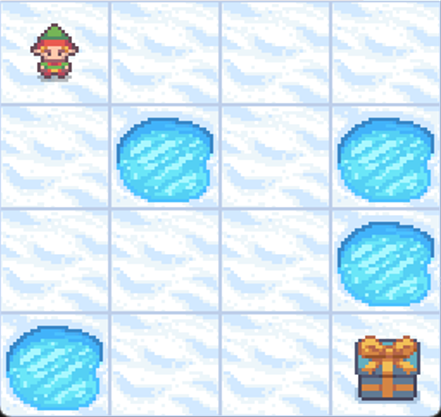

In [1]:
from IPython.display import Image, display

# Specify the path to your image file
image_path = "env.png"  # Replace with the actual path to your image file

# Display the image
display(Image(filename=image_path))


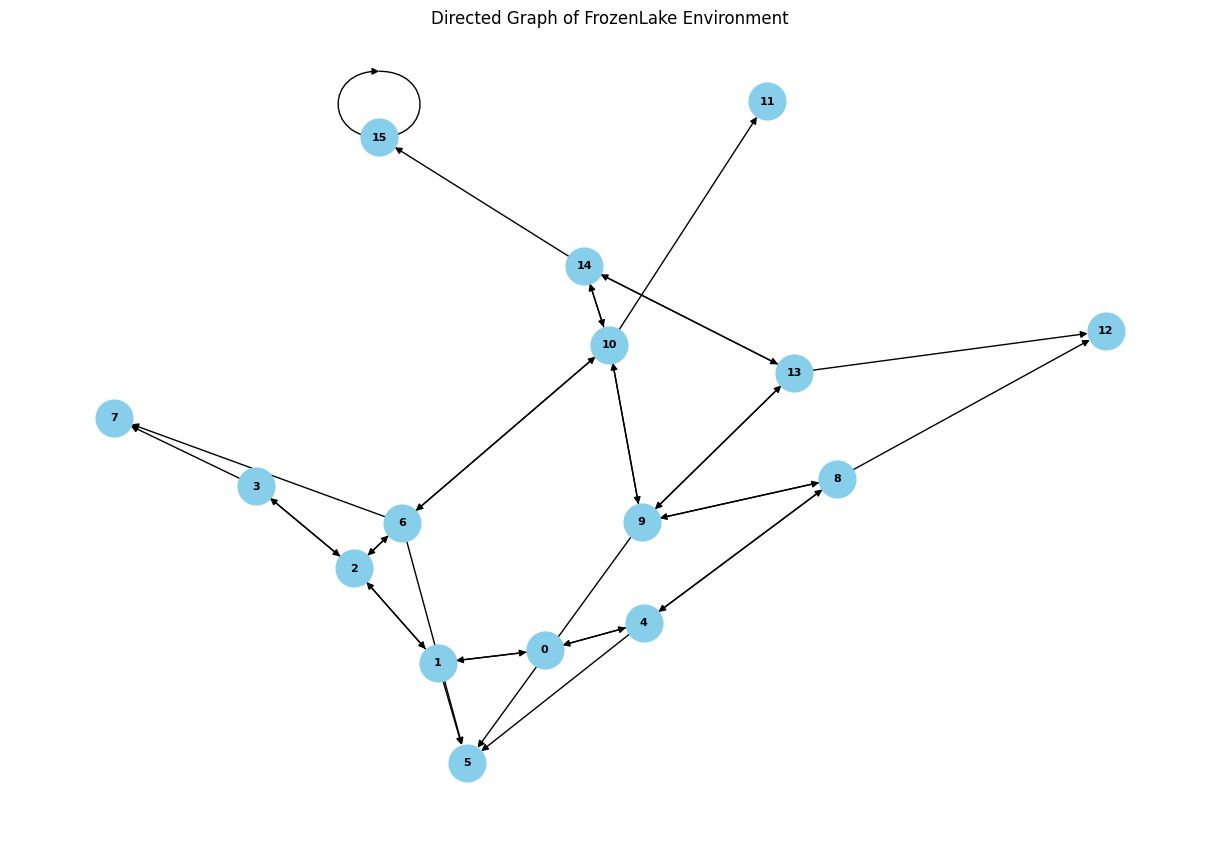

In [3]:
import gym
import networkx as nx
import matplotlib.pyplot as plt

def convert_env_to_graph(env):
    G = nx.DiGraph()

    for state in range(env.observation_space.n):
        G.add_node(state)

    # Variable to track whether a self-loop to node 15 has been added
    added_self_loop = False

    for state in range(env.observation_space.n):
        for action in range(env.action_space.n):
            transitions = env.P[state][action]
            #print(state,action)
            #print(transitions)
            for prob, next_state, reward, done in transitions:
                #print("d1",prob,next_state,reward,done)
                if state != 15:
                    # Check if the next state is not the same as the current state
                    if state != next_state:
                        # Add edges without weights
                        G.add_edge(state, next_state, action=action)
                else:
                    # Add only one self-loop to node 15
                    if not added_self_loop:
                        G.add_edge(state, next_state, action=action)
                        added_self_loop = True
        print()

    return G

env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False)
graph = convert_env_to_graph(env)

# Visualize the graph without weights and values
pos = nx.spring_layout(graph, seed=25)

plt.figure(figsize=(12, 8))
nx.draw(graph, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8, arrowsize=10)
plt.title("Directed Graph of FrozenLake Environment")
plt.show()


In [4]:
import gym
import numpy as np

def create_reward_matrix(env, graph):
    num_states = env.observation_space.n
    reward_matrix = np.full((num_states, num_states), -1, dtype=int)

    for state in range(num_states):
        for action in range(env.action_space.n):
            transitions = env.P[state][action]
            for prob, next_state, reward, done in transitions:
                if state!=15 and next_state==15:
                    print(state,next_state)
                    reward_matrix[state,next_state]=100
                    mira_expression = f"room{state} ---> r(go_room{next_state}) ---> p(room{next_state})"
                    print(mira_expression)
                elif state != 15:
                    if state != next_state and next_state not in [5,7,11,12]:
                        print(state,next_state)
                        reward_matrix[state, next_state] = 0
                        mira_expression = f"room{state} ---> r(go_room{next_state}) ---> p(room{next_state})"
                        print(mira_expression)
                else:
                    print(state,next_state)
                    reward_matrix[state, next_state] = 100
                    mira_expression = f"room{state} ---> r(go_room{next_state}) ---> p(room{next_state})"
                    print(mira_expression)

    return reward_matrix

# Create FrozenLake environment
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False)

# Convert environment to graph
graph = convert_env_to_graph(env)

# Create reward matrix
reward_matrix = create_reward_matrix(env, graph)

# Display the reward matrix
print("Reward Matrix:")
print(reward_matrix)


















0 4
room0 ---> r(go_room4) ---> p(room4)
0 1
room0 ---> r(go_room1) ---> p(room1)
1 0
room1 ---> r(go_room0) ---> p(room0)
1 2
room1 ---> r(go_room2) ---> p(room2)
2 1
room2 ---> r(go_room1) ---> p(room1)
2 6
room2 ---> r(go_room6) ---> p(room6)
2 3
room2 ---> r(go_room3) ---> p(room3)
3 2
room3 ---> r(go_room2) ---> p(room2)
4 8
room4 ---> r(go_room8) ---> p(room8)
4 0
room4 ---> r(go_room0) ---> p(room0)
6 10
room6 ---> r(go_room10) ---> p(room10)
6 2
room6 ---> r(go_room2) ---> p(room2)
8 9
room8 ---> r(go_room9) ---> p(room9)
8 4
room8 ---> r(go_room4) ---> p(room4)
9 8
room9 ---> r(go_room8) ---> p(room8)
9 13
room9 ---> r(go_room13) ---> p(room13)
9 10
room9 ---> r(go_room10) ---> p(room10)
10 9
room10 ---> r(go_room9) ---> p(room9)
10 14
room10 ---> r(go_room14) ---> p(room14)
10 6
room10 ---> r(go_room6) ---> p(room6)
13 14
room13 ---> r(go_room14) ---> p(room14)
13 9
room13 ---> r(go_room9) ---> p(room9)
14 13
room14 ---> r(go_room13) ---> p(room13)
14 15
room1

In [19]:
import gym
import numpy as np


def print_reward_expression(state, next_state):
    return f"room{state} ---> r(go_room{next_state}) ---> p(room{next_state})"

def mira_lists(state, next_state):
    mira_l = [[state, next_state, next_state]]
    return mira_l

def create_reward_matrix(env, graph):
    num_states = env.observation_space.n
    reward_matrix = np.full((num_states, num_states), -1, dtype=int)
    expressions = []
    mira_list = []

    for state in range(num_states):
        for action in range(env.action_space.n):
            transitions = env.P[state][action]
            for prob, next_state, reward, done in transitions:
                if state != 15 and next_state == 15:
                    expressions.append(print_reward_expression(state, next_state))
                    mira_list.extend(mira_lists(state, next_state))
                    reward_matrix[state, next_state] = 100
                elif state != 15 and state != next_state and next_state not in [5, 7, 11, 12]:
                    expressions.append(print_reward_expression(state, next_state))
                    mira_list.extend(mira_lists(state, next_state))
                    reward_matrix[state, next_state] = 0
                elif state == 15:
                    expressions.append(print_reward_expression(state, next_state))
                    mira_list.extend(mira_lists(state, next_state))
                    reward_matrix[state, next_state] = 100

    return reward_matrix, expressions, mira_list

# Create FrozenLake environment
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False)

# Convert environment to graph
graph = convert_env_to_graph(env)

# Create reward matrix and get expressions
reward_matrix, all_expressions, mira_list = create_reward_matrix(env, graph)

# Display the reward matrix
print("Reward Matrix:")
print(reward_matrix)

# Display all expressions
print("\nReward Expressions:")
for expression in all_expressions:
    print(expression)

mira_l=mira_list
# Display mira_list
print("\nMira List:")
for l in mira_list:
    print(l)
#print(mira_l)

















Reward Matrix:
[[ -1   0  -1  -1   0  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [  0  -1   0  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1   0  -1   0  -1  -1   0  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1   0  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [  0  -1  -1  -1  -1  -1  -1  -1   0  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1   0  -1  -1  -1  -1  -1  -1  -1   0  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1   0  -1  -1  -1  -1   0  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1   0  -1   0  -1  -1   0  -1  -1]
 [ -1  -1  -1  -1  -1  -1   0  -1  -1   0  -1  -1  -1  -1   0  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1   0  -1  -1  -1  -1   0  -1]
 [ -1  -1  -1  -1  -1  -1  -1  

In [18]:
mira_l

[[0, 4, 4],
 [0, 1, 1],
 [1, 0, 0],
 [1, 2, 2],
 [2, 1, 1],
 [2, 6, 6],
 [2, 3, 3],
 [3, 2, 2],
 [4, 8, 8],
 [4, 0, 0],
 [6, 10, 10],
 [6, 2, 2],
 [8, 9, 9],
 [8, 4, 4],
 [9, 8, 8],
 [9, 13, 13],
 [9, 10, 10],
 [10, 9, 9],
 [10, 14, 14],
 [10, 6, 6],
 [13, 14, 14],
 [13, 9, 9],
 [14, 13, 13],
 [14, 15, 15],
 [14, 10, 10],
 [15, 15, 15],
 [15, 15, 15],
 [15, 15, 15],
 [15, 15, 15]]

In [17]:

mira_graph = {}

for action in mira_l:
    current_state, next_state, _ = action
    if current_state not in mira_graph:
        mira_graph[current_state] = []
    mira_graph[current_state].append(next_state)

print("Generated MIRA Graph:")
print(mira_graph)


Generated MIRA Graph:
{0: [4, 1], 1: [0, 2], 2: [1, 6, 3], 3: [2], 4: [8, 0], 6: [10, 2], 8: [9, 4], 9: [8, 13, 10], 10: [9, 14, 6], 13: [14, 9], 14: [13, 15, 10], 15: [15, 15, 15, 15]}


In [20]:
def dfs(graph, current, goal, path=[]):
    path = path + [current]
    if current == goal:
        return [path]
    if current not in graph:
        return []
    paths = []
    for neighbor in graph[current]:
        if neighbor not in path:
            new_paths = dfs(graph, neighbor, goal, path)
            for new_path in new_paths:
                paths.append(new_path)
    return paths



# Ask the user for initial and goal states
initial_state = int(input("Enter initial state: "))
goal_state = int(input("Enter goal state: "))

# Find all paths using Depth-First Search
all_paths = dfs(mira_graph, initial_state, goal_state)

# Display all paths
if all_paths:
    print(f"All possible paths from {initial_state} to {goal_state}:")
    for path in all_paths:
        print(path)
else:
    print("No valid paths found.")


Enter initial state:  3
Enter goal state:  15


All possible paths from 3 to 15:
[3, 2, 1, 0, 4, 8, 9, 13, 14, 15]
[3, 2, 1, 0, 4, 8, 9, 10, 14, 15]
[3, 2, 6, 10, 9, 13, 14, 15]
[3, 2, 6, 10, 14, 15]
